# Decision Tree Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
pd.pandas.set_option('display.max_columns',None)

### Reading Data

In [2]:
data = pd.read_csv(r"C:\Users\dell\Downloads\archive\bank-additional-full.csv",sep = ";")
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
data.shape

(41188, 21)

### Data Preparation 

In [5]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [6]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [7]:
data.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [8]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [9]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [10]:
data.y.value_counts(normalize = True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [11]:
data.y

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

In [12]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [13]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [14]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [15]:
data.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [16]:
data.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [17]:
data.day_of_week.value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [18]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Checking Null Values

In [19]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [20]:
data['y'] = data['y'].apply(lambda y:1 if y=="yes" else 0)

In [21]:
data['default'] = data['default'].apply(lambda default:1 if default=="yes" else 0)

In [22]:
data['housing'] = data['housing'].apply(lambda housing:1 if housing=="yes" else 0)

In [23]:
data['loan'] = data['loan'].apply(lambda loan:1 if loan=="yes" else 0)

In [24]:
data.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,0,0,0,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,0,0,0,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,0,0,0,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,0,0,0,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,0,1,0,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,0,1,0,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


### Creating Dummy Variables Of Object Columns

In [25]:
data_dummy = pd.get_dummies(data[['job','marital','education','contact','month','day_of_week','poutcome']],drop_first = True)

In [26]:
data_dummy

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41184,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41185,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
41186,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [27]:
x = data.drop(['job','marital','education','contact','month','day_of_week','poutcome'],axis=1)
x

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0,0,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,0,0,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,0,1,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,0,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,0,0,1,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,0,0,0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,0,1,0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,0,0,0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


In [28]:
data = x.join(data_dummy)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   default                        41188 non-null  int64  
 2   housing                        41188 non-null  int64  
 3   loan                           41188 non-null  int64  
 4   duration                       41188 non-null  int64  
 5   campaign                       41188 non-null  int64  
 6   pdays                          41188 non-null  int64  
 7   previous                       41188 non-null  int64  
 8   emp.var.rate                   41188 non-null  float64
 9   cons.price.idx                 41188 non-null  float64
 10  cons.conf.idx                  41188 non-null  float64
 11  euribor3m                      41188 non-null  float64
 12  nr.employed                    41188 non-null 

### Checking For Outliers

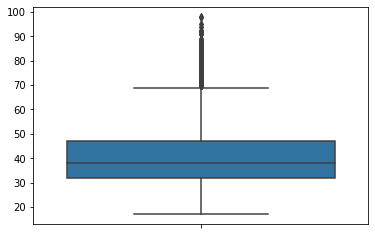

In [30]:
sns.boxplot(y = [data.age])

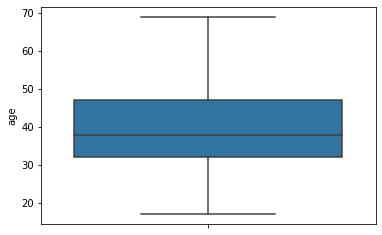

In [31]:
percentile25 = data['age'].quantile(0.25)
percentile75 = data['age'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['age'] < upper_limit]

sns.boxplot(y=data.age)

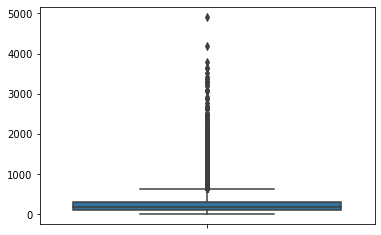

In [32]:
sns.boxplot(y = [data.duration])

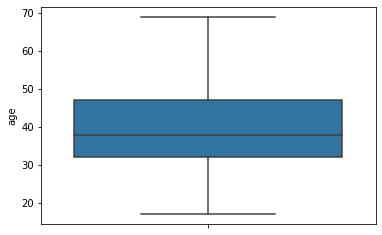

In [33]:
percentile25 = data['duration'].quantile(0.25)
percentile75 = data['duration'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['duration'] < upper_limit]

sns.boxplot(y=data.age)

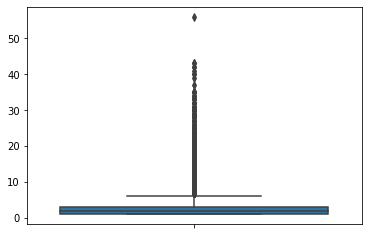

In [34]:
sns.boxplot(y = [data.campaign])

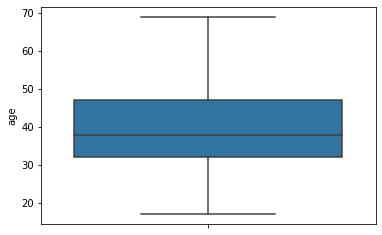

In [35]:
percentile25 = data['campaign'].quantile(0.25)
percentile75 = data['campaign'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

data = data[data['campaign'] < upper_limit]

sns.boxplot(y=data.age)

In [36]:
data.previous.value_counts()

0    29768
1     3988
2      624
3      178
4       55
5       16
6        4
7        1
Name: previous, dtype: int64

In [37]:
data.pdays.value_counts()

999    33383
3        363
6        333
4        105
9         54
2         50
12        48
7         48
10        44
5         37
13        28
1         23
11        22
15        20
14        15
8         14
0         13
16        10
17         8
18         6
22         3
21         2
26         1
19         1
20         1
25         1
27         1
Name: pdays, dtype: int64

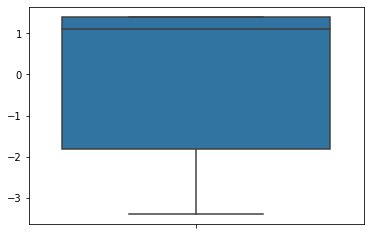

In [38]:
sns.boxplot(y = [data["emp.var.rate"]])

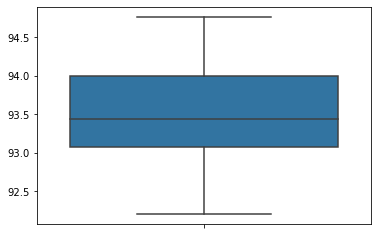

In [39]:
sns.boxplot(y = [data["cons.price.idx"]])

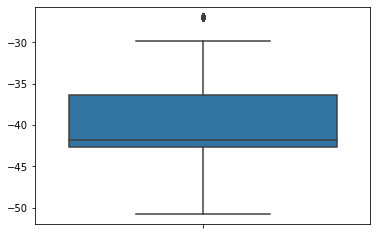

In [40]:
sns.boxplot(y = [data["cons.conf.idx"]])

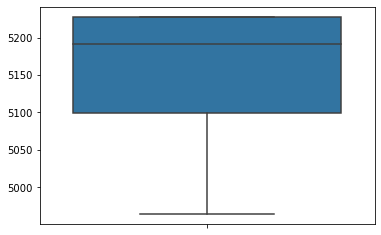

In [41]:
sns.boxplot(y = [data["nr.employed"]])

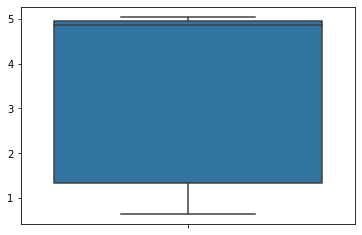

In [42]:
sns.boxplot(y = [data["euribor3m"]])

In [43]:
#code for easily checking highlycorrelated with respect to y(objective) column
cor_matrix = data.corr().abs()
print(cor_matrix)

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                    age   default   housing      loan  \
age                            1.000000  0.002638  0.006099  0.005819   
default                        0.002638  1.000000  0.003577  0.003926   
housing                        0.006099  0.003577  1.000000  0.054633   
loan                           0.005819  0.003926  0.054633  1.000000   
duration                       0.003258  0.006948  0.010610  0.007967   
campaign                       0.009572  0.005012  0.008119  0.011630   
pdays                          0.003232  0.001802  0.007747  0.001689   
previous                       0.020715  0.002956  0.018617  0.000566   
emp.var.rate                   0.068333  0.004993  0.058109  0.001451   
cons.price.idx                 0.034696  0.003252  0.080120  0.002594   
cons.conf.idx                  0.101310  0.004903  0.036050  0.013014   
euribor3m                      0.081783  0.005851  0.057590  0.001840   
nr.employed                    0.066784  0.006620  

In [44]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.60)]
print(); print(to_drop)

data = data.drop(to_drop, axis=1)
print(); print(data.head())


['cons.price.idx', 'euribor3m', 'nr.employed', 'marital_single', 'contact_telephone', 'poutcome_nonexistent', 'poutcome_success']

   age  default  housing  loan  duration  campaign  pdays  previous  \
0   56        0        0     0       261         1    999         0   
1   57        0        0     0       149         1    999         0   
2   37        0        1     0       226         1    999         0   
3   40        0        0     0       151         1    999         0   
4   56        0        0     1       307         1    999         0   

   emp.var.rate  cons.conf.idx  y  job_blue-collar  job_entrepreneur  \
0           1.1          -36.4  0                0                 0   
1           1.1          -36.4  0                0                 0   
2           1.1          -36.4  0                0                 0   
3           1.1          -36.4  0                0                 0   
4           1.1          -36.4  0                0                 0   

   job_h

In [45]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] < -0.60)]
print(); print(to_drop)

data = data.drop(to_drop, axis=1)
print(); print(data.head())


[]

   age  default  housing  loan  duration  campaign  pdays  previous  \
0   56        0        0     0       261         1    999         0   
1   57        0        0     0       149         1    999         0   
2   37        0        1     0       226         1    999         0   
3   40        0        0     0       151         1    999         0   
4   56        0        0     1       307         1    999         0   

   emp.var.rate  cons.conf.idx  y  job_blue-collar  job_entrepreneur  \
0           1.1          -36.4  0                0                 0   
1           1.1          -36.4  0                0                 0   
2           1.1          -36.4  0                0                 0   
3           1.1          -36.4  0                0                 0   
4           1.1          -36.4  0                0                 0   

   job_housemaid  job_management  job_retired  job_self-employed  \
0              1               0            0                  0   

### Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

X = data.drop(['y'], axis=1)

X.head()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,0,0,0,261,1,999,0,1.1,-36.4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,57,0,0,0,149,1,999,0,1.1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,37,0,1,0,226,1,999,0,1.1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,40,0,0,0,151,1,999,0,1.1,-36.4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,56,0,0,1,307,1,999,0,1.1,-36.4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [47]:
y = data['y']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [48]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Using Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

import warnings
warnings.filterwarnings('ignore')


num_vars = data.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove('y')

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train.head(10)

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
27097,0.767058,-0.011125,-1.051526,-0.422633,-0.719664,0.046016,0.194305,-0.358357,-0.097302,-0.324901,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34485,-0.887445,-0.011125,0.950999,2.366121,0.650210,-0.835162,0.194305,-0.358357,-1.180005,-1.227901,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
34554,-1.301070,-0.011125,0.950999,-0.422633,-0.855935,-0.835162,0.194305,1.669571,-1.180005,-1.227901,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
15809,0.767058,-0.011125,-1.051526,-0.422633,1.073365,-0.835162,0.194305,-0.358357,0.858024,-0.475401,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4151,-0.887445,-0.011125,-1.051526,-0.422633,0.757792,0.046016,0.194305,-0.358357,0.666959,0.879098,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
40092,-0.370413,-0.011125,0.950999,2.366121,0.700415,1.808372,-5.162826,1.669571,-1.116317,0.040598,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
39992,-1.404477,-0.011125,-1.051526,-0.422633,2.801845,1.808372,-5.114418,5.725425,-1.116317,0.148098,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
12643,-0.370413,-0.011125,0.950999,-0.422633,0.047752,0.046016,0.194305,-0.358357,0.858024,-0.475401,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4742,0.456838,-0.011125,-1.051526,-0.422633,0.090785,-0.835162,0.194305,-0.358357,0.666959,0.879098,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
19889,-1.094257,-0.011125,-1.051526,-0.422633,2.249592,0.046016,0.194305,-0.358357,0.858024,0.943598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
### Checking the Yes Possibility Rate
y_rate = (sum(data['y'])/len(data['y'].index))*100
y_rate

8.185597967315354

### Checking For Colinearity

In [51]:
data.corr()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,0.002638,-0.006099,-0.005819,0.003258,0.009572,0.003232,-0.020715,0.068333,0.101310,-0.016594,-0.001951,0.042967,0.086260,0.078962,0.333872,0.004019,-0.055364,-0.214930,-0.052487,0.001319,0.050672,0.291000,-0.008145,0.019302,-0.033958,-0.097739,0.012275,0.007164,-0.063083,0.063644,0.066286,0.025913,-0.035901,0.000139,-0.028131,-0.047030,0.036442,0.015668,-0.000560,0.023102,-0.021128,0.015433,-0.027900
default,0.002638,1.000000,-0.003577,-0.003926,-0.006948,-0.005012,0.001802,0.002956,0.004993,0.004903,-0.002779,-0.005044,-0.001801,-0.001498,-0.002593,-0.001694,-0.001760,-0.003046,-0.001399,0.012540,0.018379,-0.000827,0.007514,-0.000384,-0.002255,-0.003893,0.002229,-0.000187,0.015000,-0.006061,-0.001926,0.013482,-0.000582,-0.004122,-0.003534,-0.001080,-0.006705,0.006892,-0.001226,-0.001074,-0.004803,-0.004734,0.018695,-0.004618
housing,-0.006099,-0.003577,1.000000,0.054633,-0.010610,-0.008119,-0.007747,0.018617,-0.058109,-0.036050,0.013472,-0.013890,0.002610,-0.004822,-0.007160,-0.006580,-0.002602,-0.004428,0.001642,0.012209,0.011154,-0.002196,-0.012683,-0.002791,-0.009983,0.002232,-0.006669,-0.001017,0.014348,0.012571,-0.009886,0.027619,0.006578,0.003053,-0.051966,0.011808,-0.028032,0.031698,0.000254,0.008635,0.012699,0.010327,-0.010622,0.001840
loan,-0.005819,-0.003926,0.054633,1.000000,-0.007967,0.011630,0.001689,-0.000566,0.001451,-0.013014,-0.007997,-0.006824,-0.004667,0.000511,-0.000838,-0.007165,-0.009114,-0.002448,0.002994,-0.006245,-0.000928,0.002809,0.005315,0.002129,-0.002111,-0.007417,-0.001869,-0.000459,0.003861,0.012380,-0.012912,0.000130,0.004672,0.010327,-0.005618,-0.002449,0.001519,-0.005716,-0.010125,0.001613,0.007915,-0.003009,-0.008687,-0.003492
duration,0.003258,-0.006948,-0.010610,-0.007967,1.000000,-0.041126,-0.073215,0.045564,-0.054458,-0.004803,0.266464,0.014680,0.000152,-0.001246,-0.002797,0.014709,-0.011559,0.003237,0.023834,-0.018626,-0.002695,-0.007762,-0.005193,0.014144,-0.000957,0.012105,0.006193,-0.002688,-0.009964,-0.019936,0.009071,-0.051155,0.024642,0.013106,-0.027139,0.006001,0.037036,-0.039144,0.012560,0.017196,-0.017330,0.012785,0.009107,0.016528
campaign,0.009572,-0.005012,-0.008119,0.011630,-0.041126,1.000000,0.042168,-0.060103,0.096428,-0.009669,-0.054878,-0.000755,0.004739,-0.004007,-0.006752,0.006436,0.012941,0.000357,-0.020360,-0.000571,-0.010491,-0.005241,-0.000221,-0.006530,0.009722,-0.000474,0.000138,0.002321,0.005743,-0.003417,0.001247,0.018653,-0.001254,0.056108,0.022645,-0.011156,0.008103,-0.059792,-0.051197,-0.027682,0.058974,-0.044256,-0.023992,-0.024442
pdays,0.003232,0.001802,-0.007747,0.001689,-0.073215,0.042168,1.000000,-0.573947,0.265606,-0.089532,-0.380836,0.063171,0.018376,-0.000431,-0.001768,-0.036840,0.016248,0.028258,-0.099300,0.000159,-0.028504,-0.010949,0.036190,-0.006982,0.021202,0.034471,0.000212,0.003893,-0.003563,-0.043221,-0.014477,-0.006806,-0.067343,0.048601,0.011902,-0.086932,0.076177,-0.016088,-0.129761,-0.155715,0.004215,-0.011450,-0.003705,-0.001924
previous,-0.020715,0.002956,0.018617,-0.000566,0.045564,-0.060103,-0.573947,1.000000,-0.419483,-0.061905,0.267610,-0.051519,-0.011321,-0.015607,0.008726,0.021683,-0.010122,-0.007129,0.110838,-0.013644,0.012871,-0.005123,-0.048514,0.007931,-0.019686,-0.023151,0.021991,-0.004255,-0.011247,0.030633,0.016025,-0.049653,0.054505,-0.115849,-0.068514,0.078460,-0.017502,0.085253,0.128326,0.150038,-0.002569,0.002616,-0.001430,-

In [128]:
X_train

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
27097,0.767058,-0.011125,-1.051526,-0.422633,-0.719664,0.046016,0.194305,-0.358357,-0.097302,-0.324901,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
34485,-0.887445,-0.011125,0.950999,2.366121,0.650210,-0.835162,0.194305,-0.358357,-1.180005,-1.227901,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
34554,-1.301070,-0.011125,0.950999,-0.422633,-0.855935,-0.835162,0.194305,1.669571,-1.180005,-1.227901,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
15809,0.767058,-0.011125,-1.051526,-0.422633,1.073365,-0.835162,0.194305,-0.358357,0.858024,-0.475401,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4151,-0.887445,-0.011125,-1.051526,-0.422633,0.757792,0.046016,0.194305,-0.358357,0.666959,0.879098,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20172,-0.370413,-0.011125,-1.051526,-0.422633,0.011891,-0.835162,0.194305,-0.358357,0.858024,0.943598,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
19707,0.870464,-0.011125,-1.051526,2.366121,-0.798558,0.927194,0.194305,-0.358357,0.858024,0.943598,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
84,-0.163600,-0.011125,-1.051526,2.366121,-1.343639,-0.835162,0.194305,-0.358357,0.666959,0.879098,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
14331,-0.577225,-0.011125,0.950999,-0.422633,2.507788,2.689550,0.194305,-0.358357,0.858024,-0.475401,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


In [129]:
X_test

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_unknown,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
12508,-0.577225,-0.011125,0.950999,-0.422633,-0.059830,1.808372,0.194305,-0.358357,0.858024,-0.475401,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
36109,0.146619,-0.011125,0.950999,-0.422633,0.327465,-0.835162,0.194305,-0.358357,-1.180005,-1.227901,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
24760,1.490902,-0.011125,0.950999,-0.422633,-0.490157,1.808372,0.194305,1.669571,-0.097302,-0.324901,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
37124,-0.887445,-0.011125,-1.051526,-0.422633,-0.497329,-0.835162,-5.098282,1.669571,-1.880578,1.954098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2759,-0.577225,-0.011125,0.950999,2.366121,0.356153,-0.835162,0.194305,-0.358357,0.666959,0.879098,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6631,-1.507883,-0.011125,-1.051526,-0.422633,-0.418436,0.046016,0.194305,-0.358357,0.666959,0.879098,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
13562,-1.094257,-0.011125,-1.051526,-0.422633,-0.741181,-0.835162,0.194305,-0.358357,0.858024,-0.475401,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
14436,-0.680632,-0.011125,-1.051526,-0.422633,-0.698148,0.046016,0.194305,-0.358357,0.858024,-0.475401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
16134,-0.990851,-0.011125,-1.051526,2.366121,-0.576222,0.046016,0.194305,-0.358357,0.858024,-0.475401,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [130]:
y_train

27097    0
34485    0
34554    0
15809    0
4151     0
        ..
20172    0
19707    0
84       0
14331    0
16902    0
Name: y, Length: 24243, dtype: int64

In [131]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
dt_gini = DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=2)
dt_en = DecisionTreeClassifier(criterion = "entropy",random_state = 42)

In [132]:
dt_gini.fit(X_train, y_train)
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [133]:
y_pred = dt_gini.predict(X_test)
y_pred1 = dt_en.predict(X_test)

In [134]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9565
           1       0.76      0.24      0.36       826

    accuracy                           0.93     10391
   macro avg       0.85      0.62      0.66     10391
weighted avg       0.92      0.93      0.92     10391



In [135]:
print("Classification report - \n", classification_report(y_test,y_pred1))

Classification report - 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      9565
           1       0.45      0.49      0.47       826

    accuracy                           0.91     10391
   macro avg       0.70      0.72      0.71     10391
weighted avg       0.92      0.91      0.91     10391



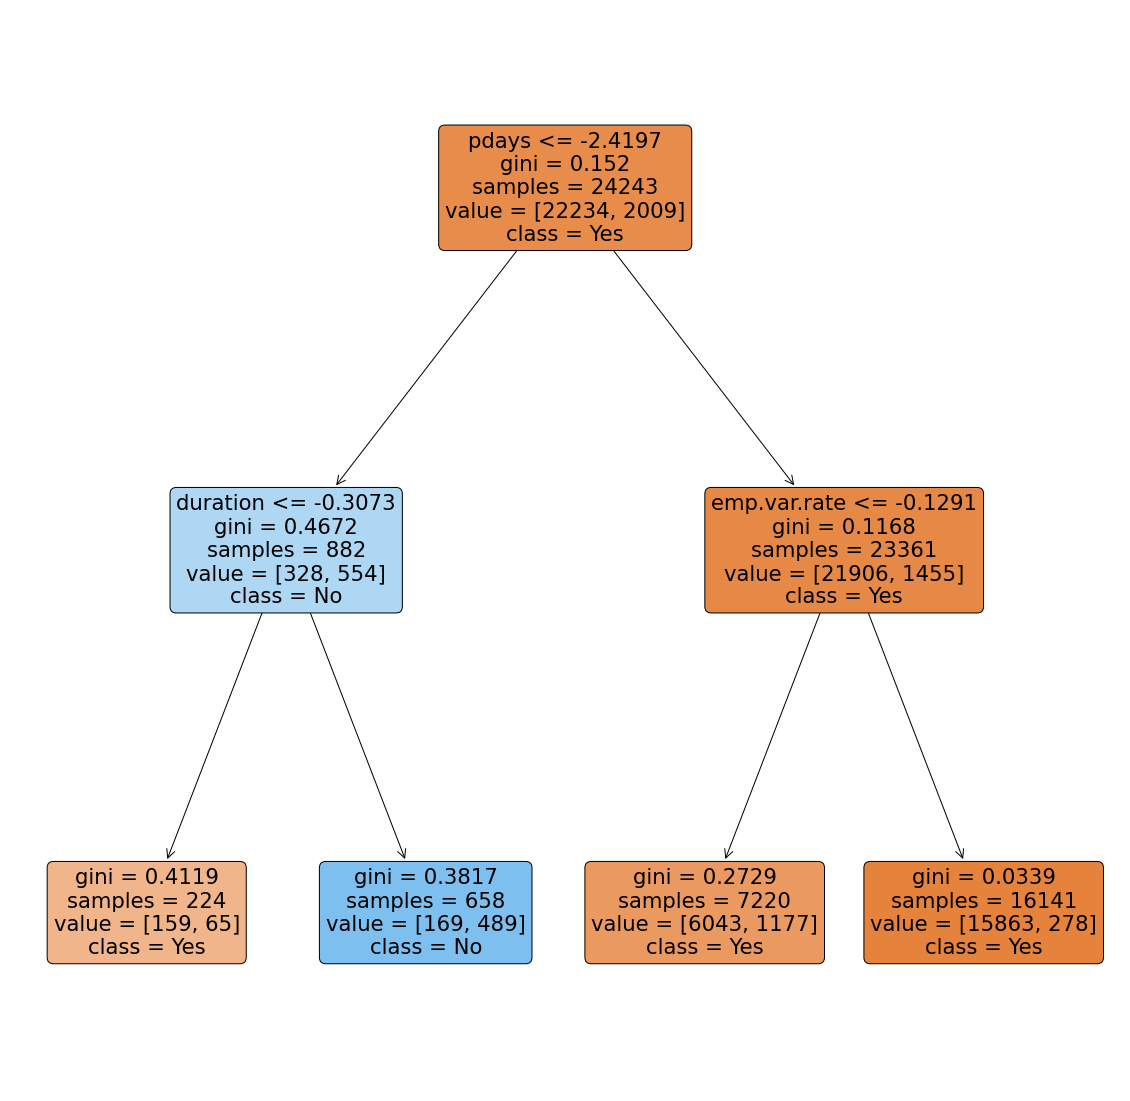

In [136]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dt_gini, feature_names = data.columns, 
                     class_names =["Yes", "No"] , filled = True , precision = 4, rounded = True)

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
params = {'criterion':["gini","entropy"], "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5,7,9,10] }
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring="f1_macro",verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:  1.0min finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, None],
                         'min_samples_leaf': [1, 2, 5, 7, 9, 10],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='f1_macro', verbose=1)

In [138]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=7,
                       random_state=42)

In [139]:
grid_search_cv = grid_search_cv.best_estimator_

In [140]:
y_pred = grid_search_cv.predict(X_test)

In [141]:
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97      9565
           1       0.65      0.46      0.54       826

    accuracy                           0.94     10391
   macro avg       0.80      0.72      0.75     10391
weighted avg       0.93      0.94      0.93     10391



In [157]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9369646809739197

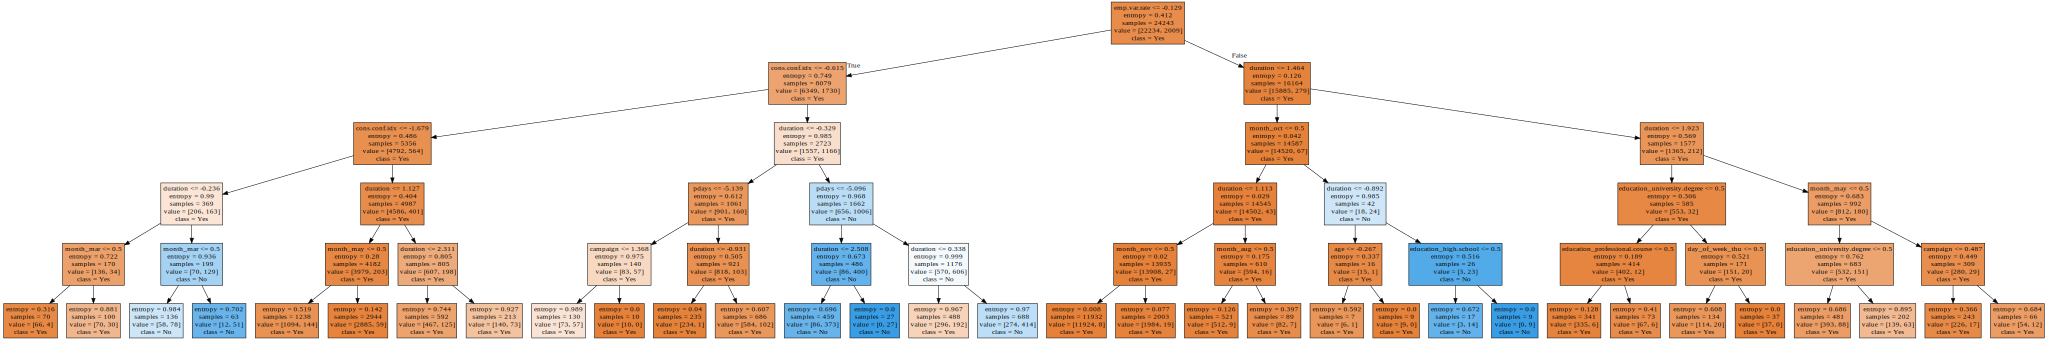

In [143]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(grid_search_cv, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Yes", "No"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

[Text(1395.0, 2491.5, 'X[8] <= -0.129\nentropy = 0.412\nsamples = 24243\nvalue = [22234, 2009]'),
 Text(697.5, 2038.5, 'X[9] <= -0.615\nentropy = 0.749\nsamples = 8079\nvalue = [6349, 1730]'),
 Text(348.75, 1585.5, 'X[9] <= -1.679\nentropy = 0.486\nsamples = 5356\nvalue = [4792, 564]'),
 Text(174.375, 1132.5, 'X[4] <= -0.236\nentropy = 0.99\nsamples = 369\nvalue = [206, 163]'),
 Text(87.1875, 679.5, 'X[34] <= 0.5\nentropy = 0.722\nsamples = 170\nvalue = [136, 34]'),
 Text(43.59375, 226.5, 'entropy = 0.316\nsamples = 70\nvalue = [66, 4]'),
 Text(130.78125, 226.5, 'entropy = 0.881\nsamples = 100\nvalue = [70, 30]'),
 Text(261.5625, 679.5, 'X[34] <= 0.5\nentropy = 0.936\nsamples = 199\nvalue = [70, 129]'),
 Text(217.96875, 226.5, 'entropy = 0.984\nsamples = 136\nvalue = [58, 78]'),
 Text(305.15625, 226.5, 'entropy = 0.702\nsamples = 63\nvalue = [12, 51]'),
 Text(523.125, 1132.5, 'X[4] <= 1.127\nentropy = 0.404\nsamples = 4987\nvalue = [4586, 401]'),
 Text(435.9375, 679.5, 'X[35] <= 0.5\ne

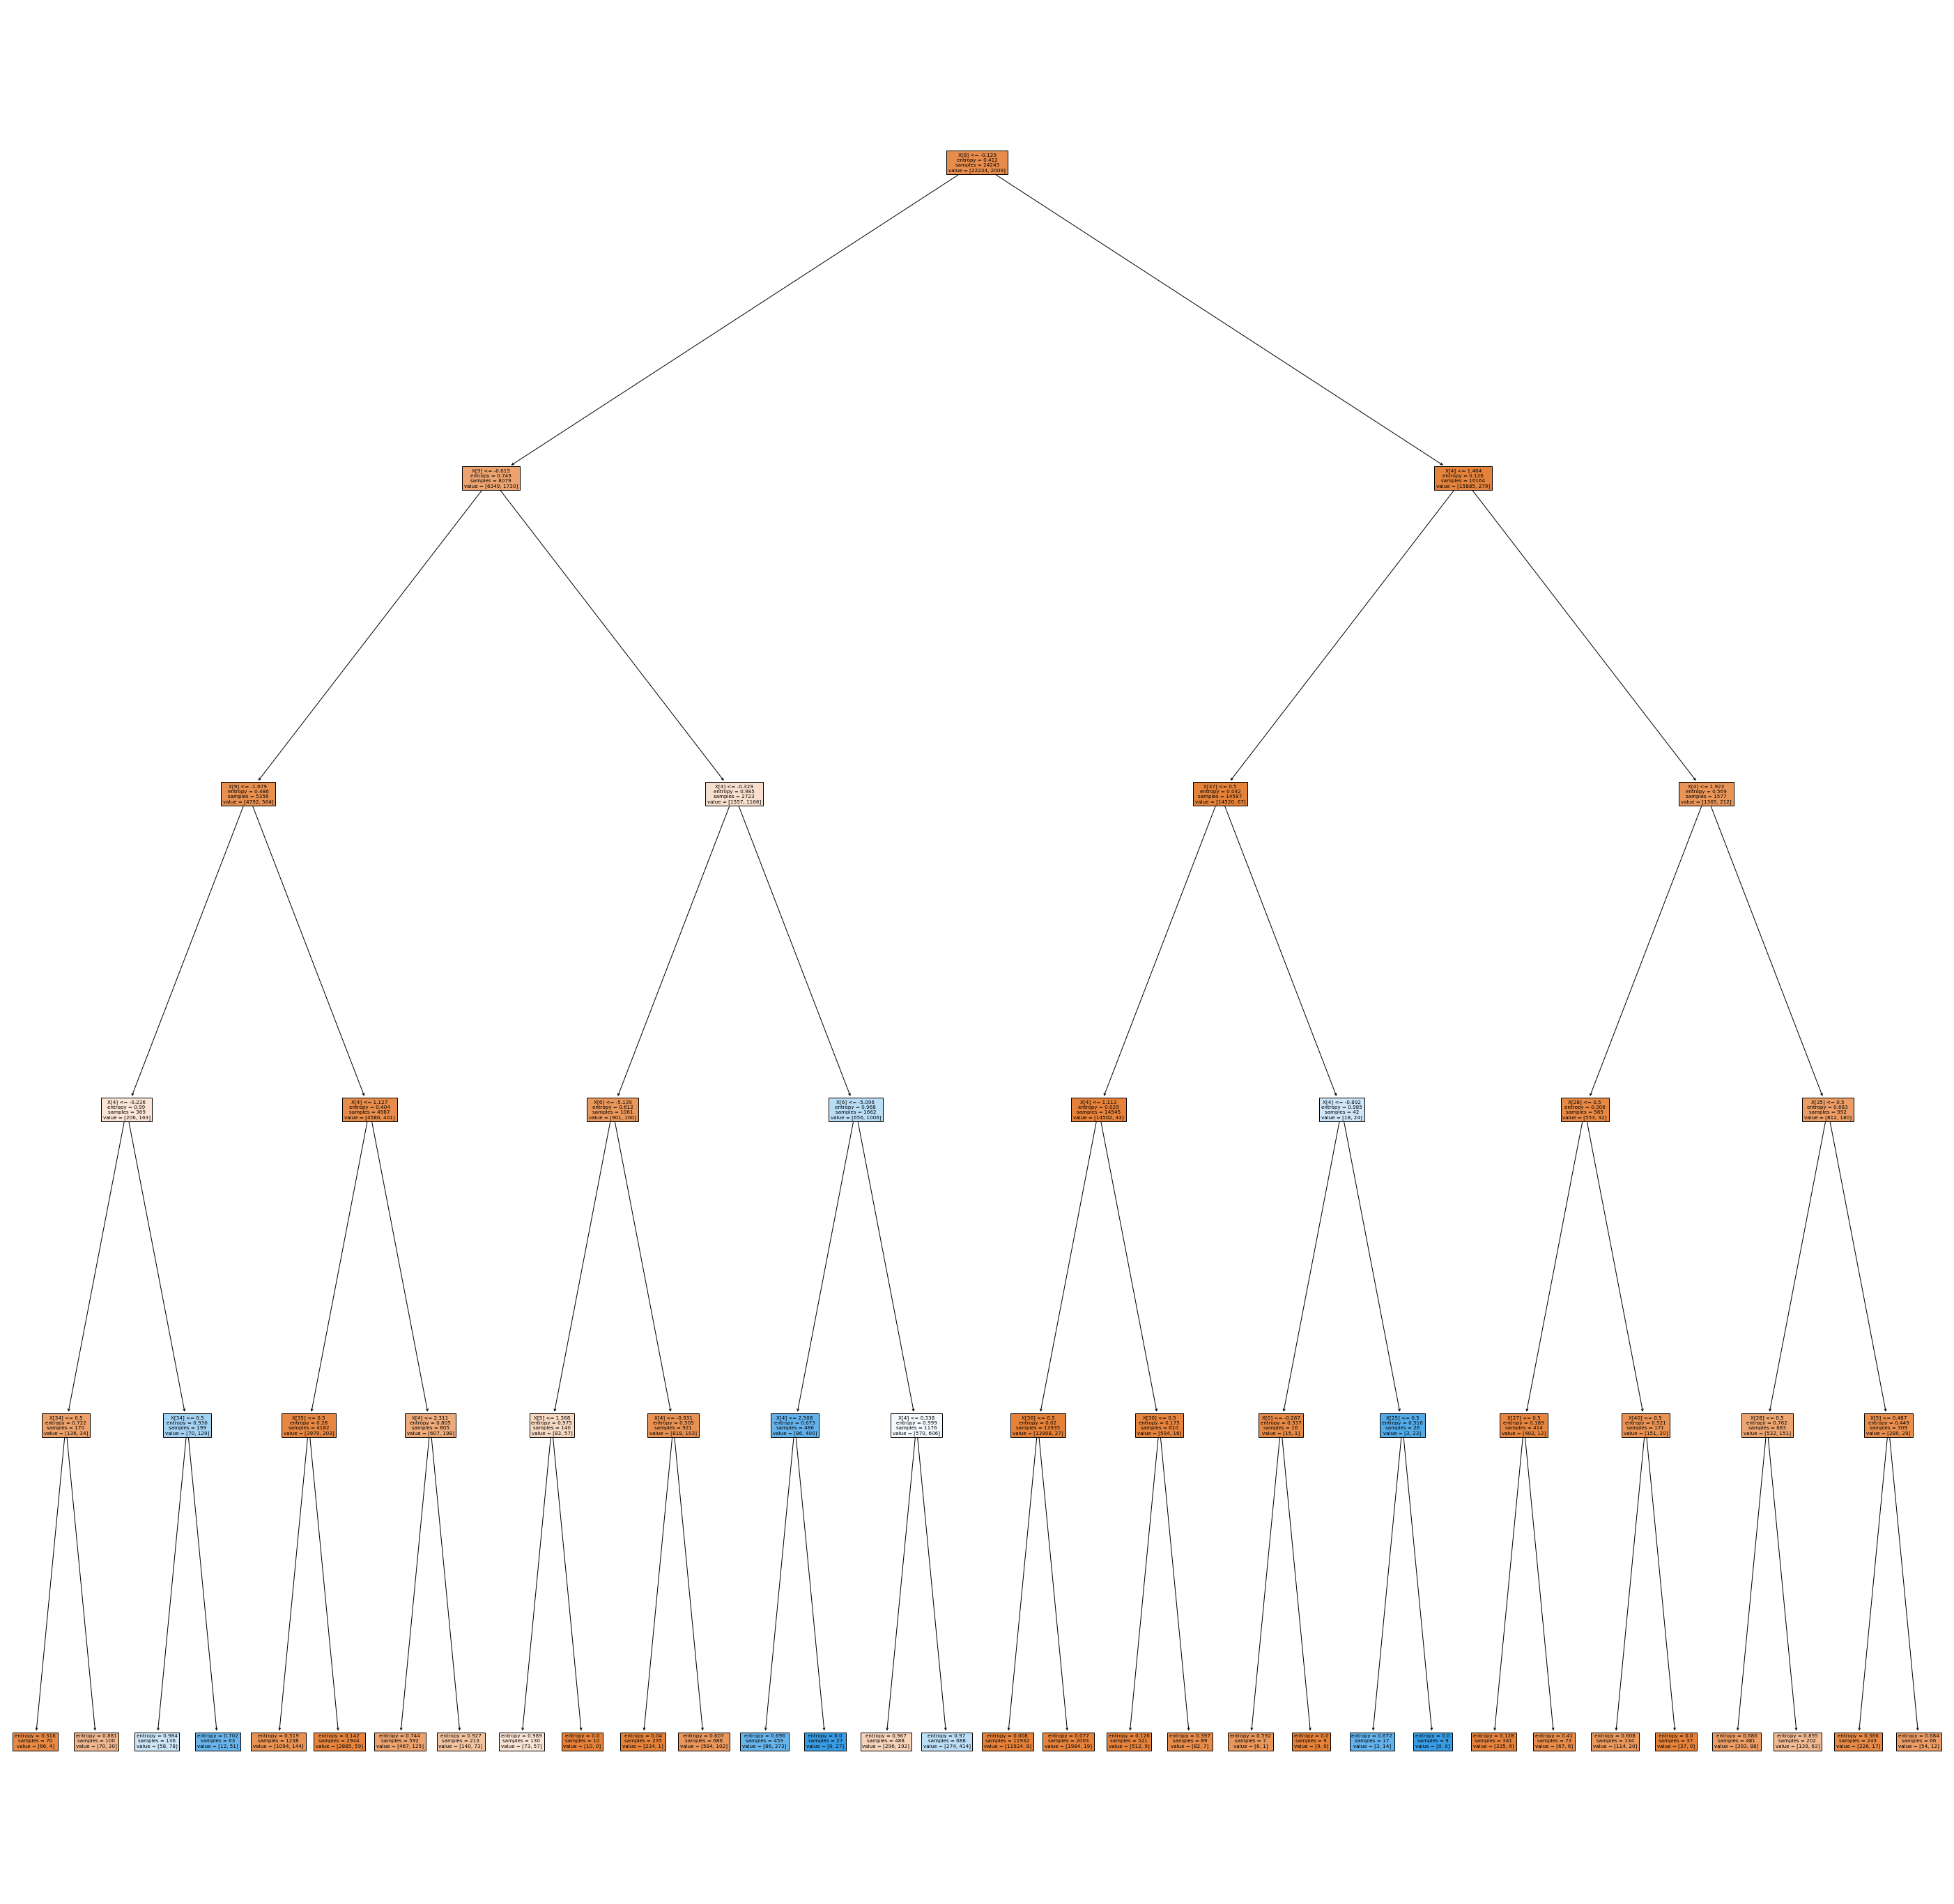

In [176]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(grid_search_cv,filled=True)

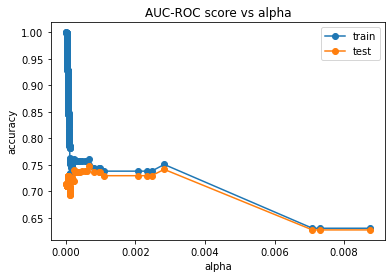

In [145]:
from sklearn.metrics import roc_auc_score
# Allow a decision tree to grow to its full depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [roc_auc_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [roc_auc_score(y_test, clf.predict(X_test)) for clf in clfs]



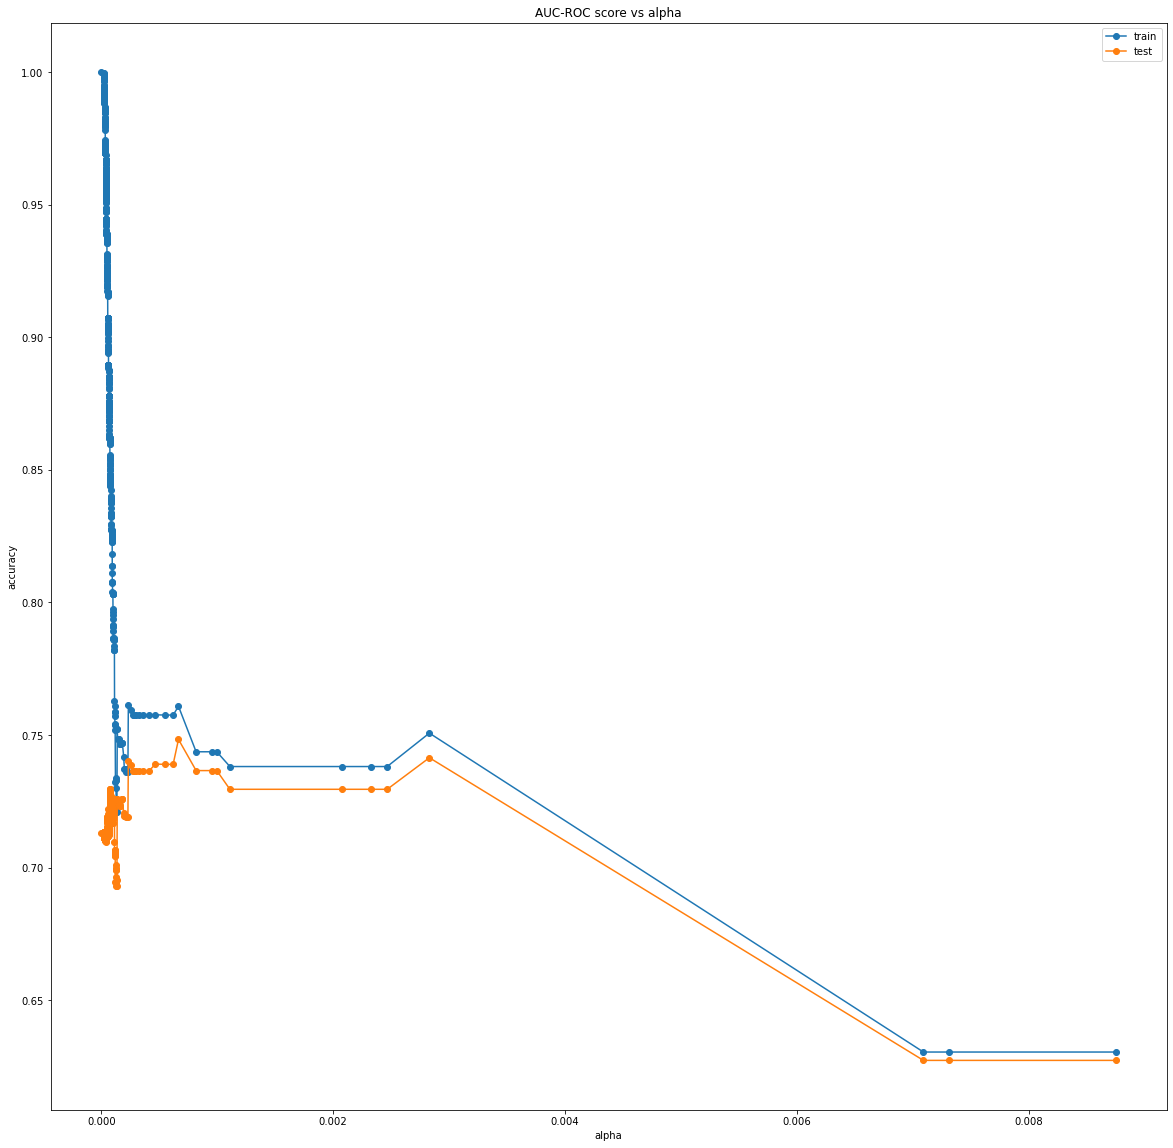

<Figure size 1440x1440 with 0 Axes>

In [152]:

fig, ax = plt.subplots(figsize = (20,20))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.figure(figsize = (20,20))
plt.show()

In [171]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.001)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

In [172]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9356173611779425

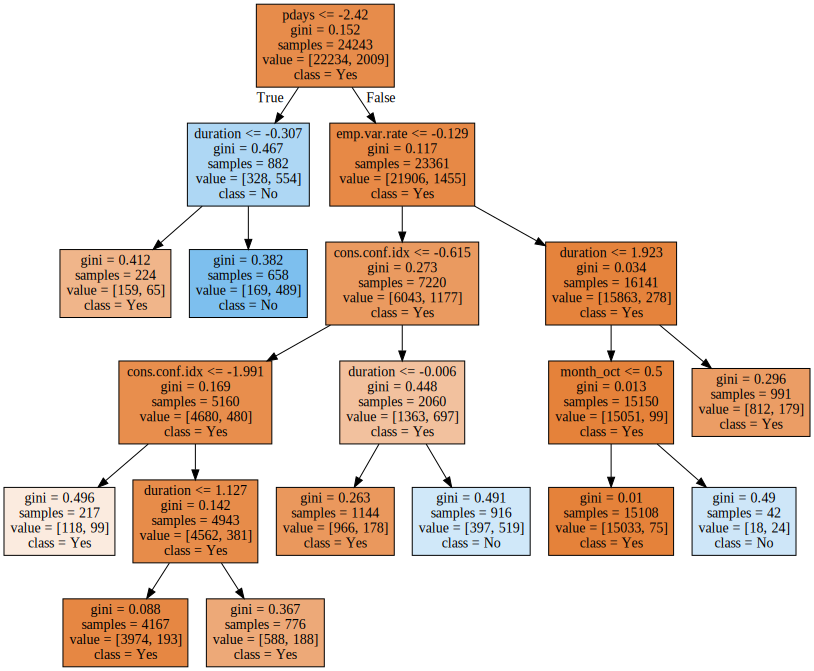

In [173]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=["Yes", "No"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

[Text(1046.25, 2491.5, 'X[6] <= -2.42\ngini = 0.152\nsamples = 24243\nvalue = [22234, 2009]'),
 Text(398.57142857142856, 2038.5, 'X[4] <= -0.307\ngini = 0.467\nsamples = 882\nvalue = [328, 554]'),
 Text(199.28571428571428, 1585.5, 'gini = 0.412\nsamples = 224\nvalue = [159, 65]'),
 Text(597.8571428571429, 1585.5, 'gini = 0.382\nsamples = 658\nvalue = [169, 489]'),
 Text(1693.9285714285713, 2038.5, 'X[8] <= -0.129\ngini = 0.117\nsamples = 23361\nvalue = [21906, 1455]'),
 Text(996.4285714285713, 1585.5, 'X[9] <= -0.615\ngini = 0.273\nsamples = 7220\nvalue = [6043, 1177]'),
 Text(597.8571428571429, 1132.5, 'X[9] <= -1.991\ngini = 0.169\nsamples = 5160\nvalue = [4680, 480]'),
 Text(398.57142857142856, 679.5, 'gini = 0.496\nsamples = 217\nvalue = [118, 99]'),
 Text(797.1428571428571, 679.5, 'X[4] <= 1.127\ngini = 0.142\nsamples = 4943\nvalue = [4562, 381]'),
 Text(597.8571428571429, 226.5, 'gini = 0.088\nsamples = 4167\nvalue = [3974, 193]'),
 Text(996.4285714285713, 226.5, 'gini = 0.367\ns

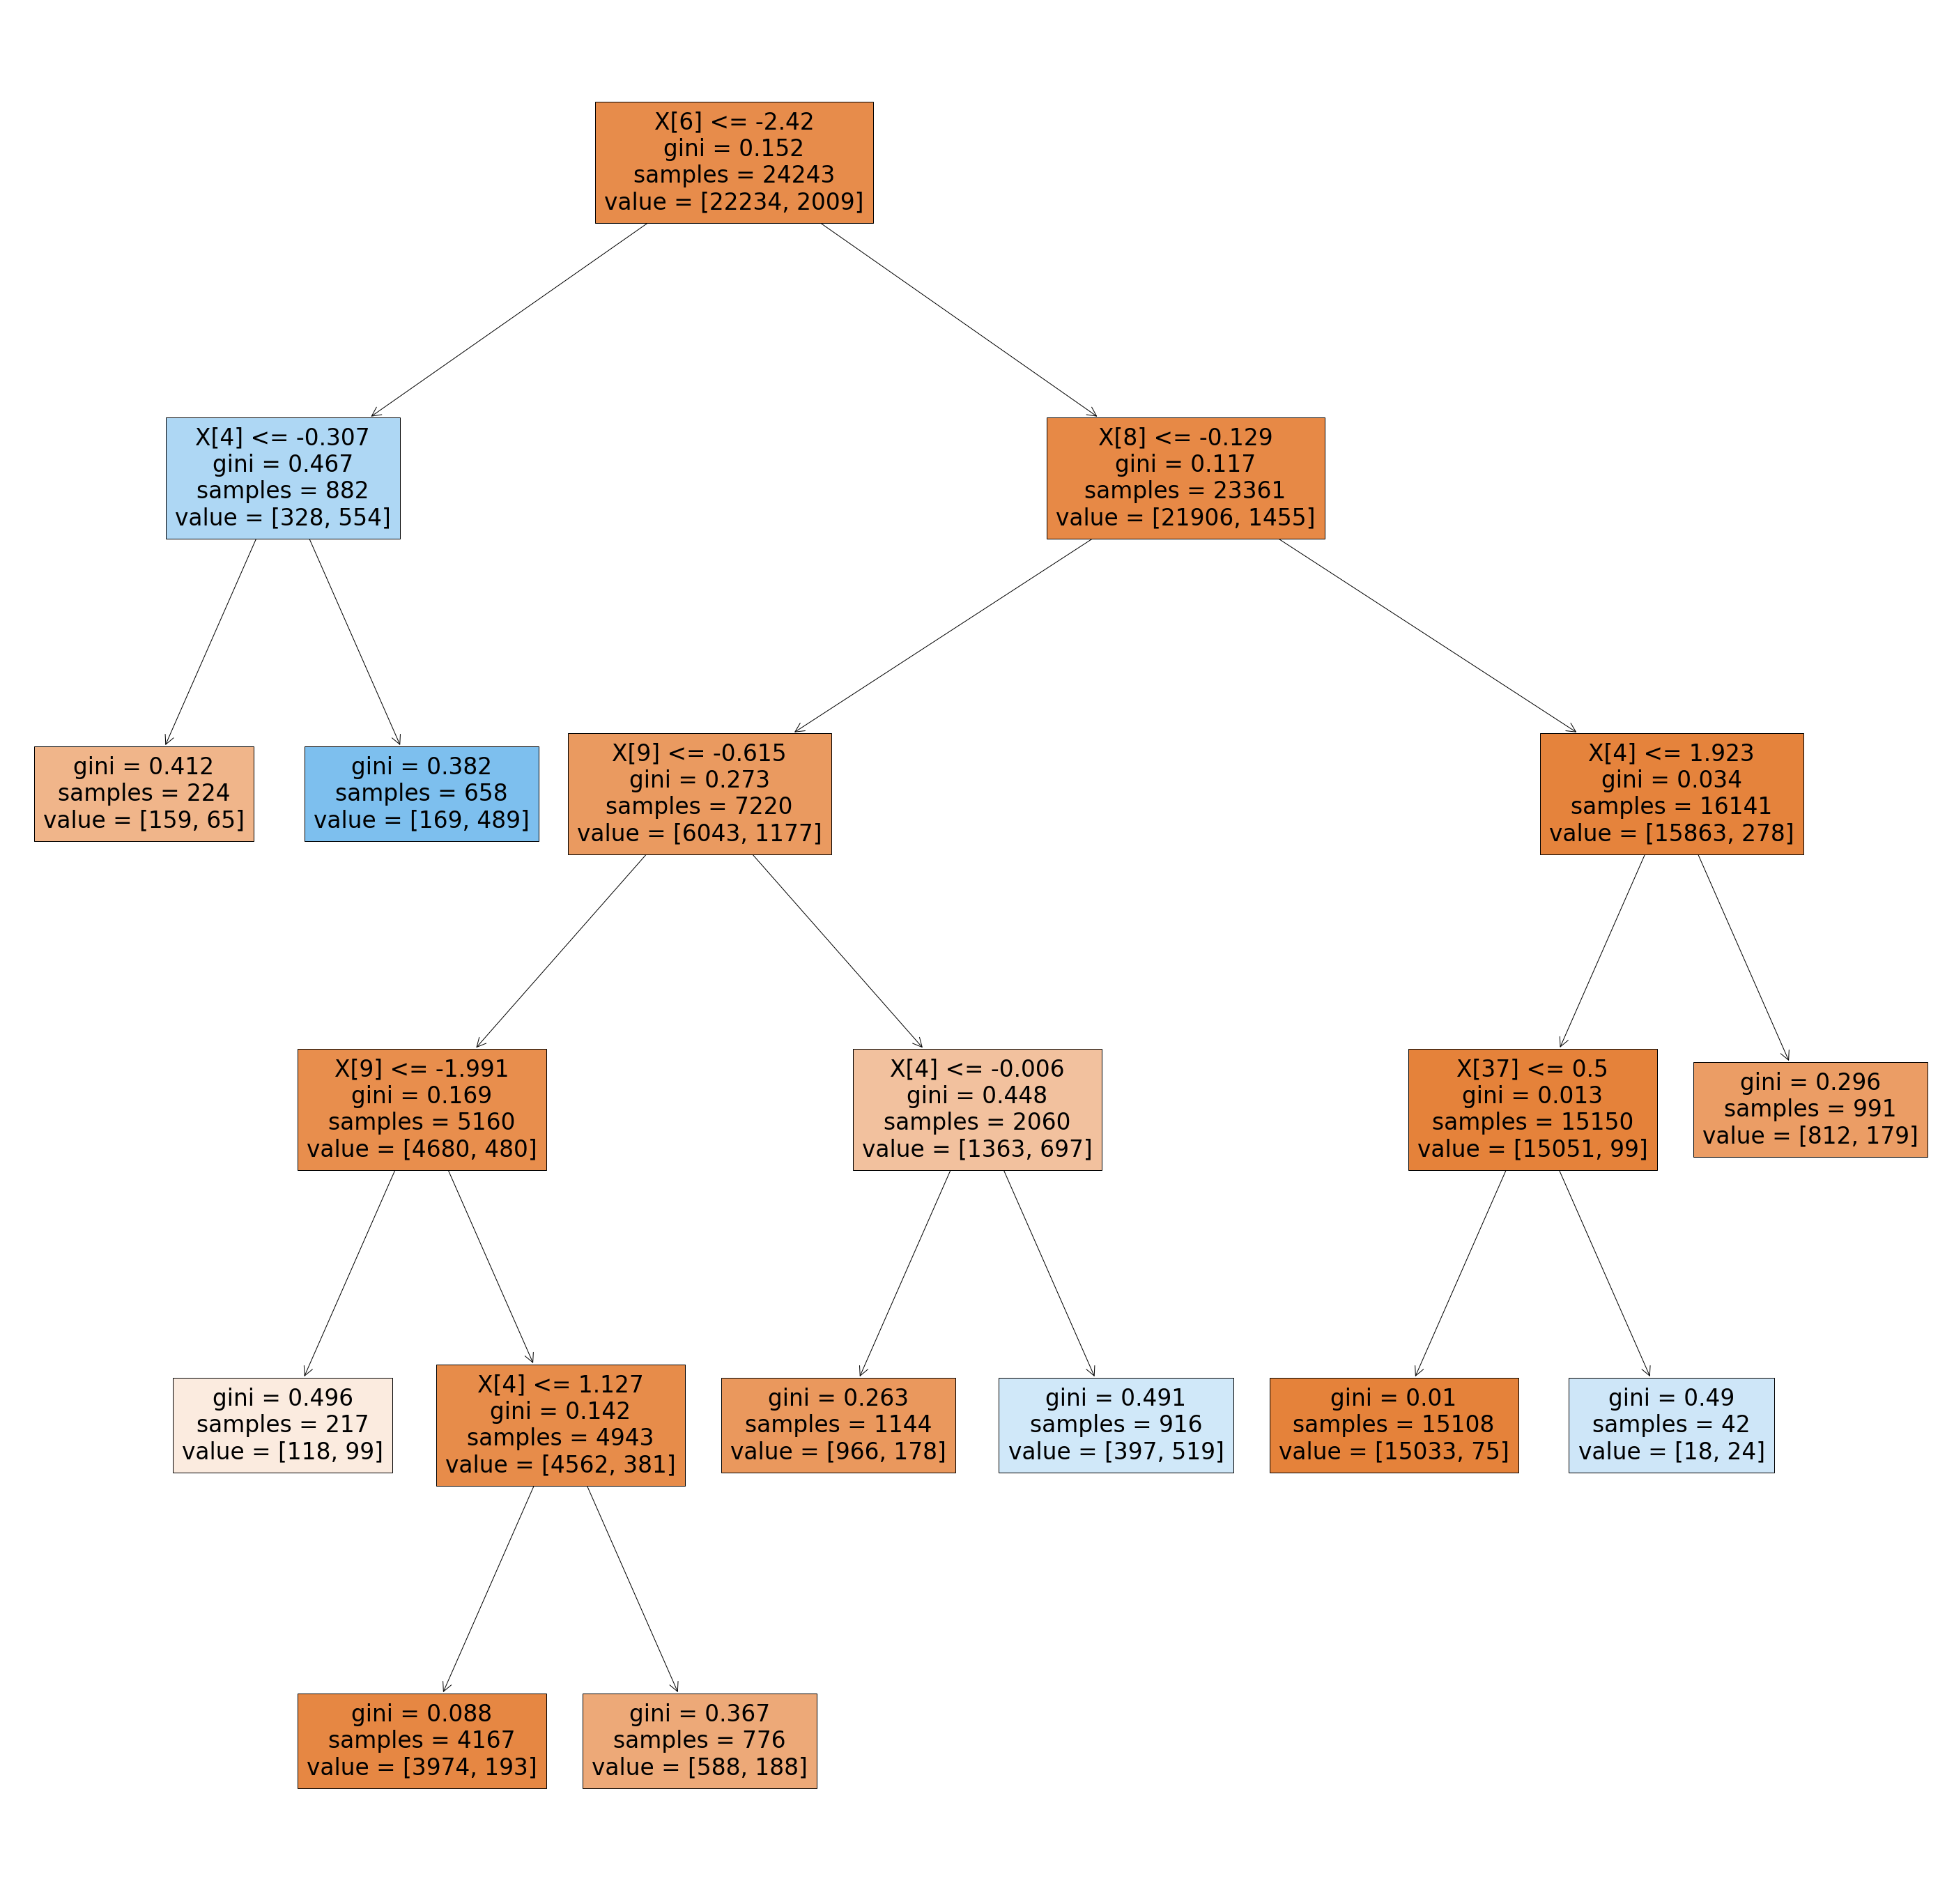

In [177]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(clf,filled=True)